Завантажую файл з назвами класів та їх мітками. Після чого перетворюю його на словник, який допоможе перетворити категореальні класи в ванхот вектори.

In [26]:
marksTypes = {}
with open("marks", 'r') as file:
    for line in file:
        line = line.replace('\n', '').replace('.', '').split(': ')
        marksTypes[line[0]] = line[1].split(', ')
marksTypes['income'] = ['<=50K', '>50K']
marksTypes.keys()

dict_keys(['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

Завантажую сам датасет і перетворюю його на падовський датафрейм.

In [27]:
import pandas as pd

mainData = []
with open("adult.data", 'r') as file:
    for line in file:
        mainData.append(line.replace('\n', '').split(', '))

DataFrame = pd.DataFrame(columns=marksTypes.keys(), data = mainData)

DataFrame

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Виводжу: 

Для кількісних ознак – мінімум, максимум, середнє, середньоквадратичне відхилення, 1-й, 2-й та 3-й квартилі

Для якісних – кількість унікальних значень, частота кожного унікального значення.

In [28]:
import numpy as np

def createNumColData(key):
    res = []
    res.append(key)
    res.append(DataFrame[key].min())
    res.append(DataFrame[key].max())
    res.append(DataFrame[key].mean())
    res.append(DataFrame[key].std())
    res.append(DataFrame[key].quantile(0.25))
    res.append(DataFrame[key].quantile(0.5))
    res.append(DataFrame[key].quantile(0.75))
    return res

def createCategoricalColData(key):
    unique_values = DataFrame[key].unique()
    value_counts = DataFrame[key].value_counts()
    if len(unique_values) != len(value_counts):
        value_counts.loc[np.nan] = DataFrame[key].isna().sum()
        value_counts.loc["unique_values"] = len(DataFrame[key].unique())
    result_df = pd.DataFrame(data = value_counts, columns = ["count"])
    return result_df

numericDataTable = []
categoricalDataTable = {}
for key in marksTypes.keys():
    DataFrame[key] = DataFrame[key].replace('?', pd.NA)
    if marksTypes[key] == ['continuous']:
        DataFrame[key] = DataFrame[key].astype(float)
        numericDataTable.append(createNumColData(key))
    else:
        categoricalDataTable[key] = createCategoricalColData(key)
        
        
numericDataDF = pd.DataFrame(data = numericDataTable, columns = ['key', 'min', 'max', 'mean', 'std', 'first quart', 'second quart', 'third quart'])
display(numericDataDF)
for key in categoricalDataTable.keys():
    display(categoricalDataTable[key])

,key,min,max,mean,std,first quart,second quart,third quart
0,age,17.0,90.0,38.581647,13.640433,28.0,37.0,48.0
1,fnlwgt,12285.0,1484705.0,189778.366512,105549.977697,117827.0,178356.0,237051.0
2,education-num,1.0,16.0,10.080679,2.572720,9.0,10.0,12.0
3,capital-gain,0.0,99999.0,1077.648844,7385.292085,0.0,0.0,0.0
4,capital-loss,0.0,4356.0,87.303830,402.960219,0.0,0.0,0.0
5,hours-per-week,1.0,99.0,40.437456,12.347429,40.0,40.0,45.0


,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7
NaN,1836


,count
education,
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646


,count
marital-status,
Married-civ-spouse,14976
Never-married,10683
Divorced,4443
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
Transport-moving,1597
Handlers-cleaners,1370


,count
relationship,
Husband,13193
Not-in-family,8305
Own-child,5068
Unmarried,3446
Wife,1568
Other-relative,981


,count
race,
White,27816
Black,3124
Asian-Pac-Islander,1039
Amer-Indian-Eskimo,311
Other,271


,count
sex,
Male,21790
Female,10771


,count
native-country,
United-States,29170
Mexico,643
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95


,count
income,
<=50K,24720
>50K,7841


In [29]:
Виводжу інформацію по нанам.

SyntaxError: invalid syntax (3166106505.py, line 1)

In [30]:
for key in marksTypes.keys():
    print(key + " NaNnum: " + str(DataFrame[key].isna().sum()))

age NaNnum: 0
workclass NaNnum: 1836
fnlwgt NaNnum: 0
education NaNnum: 0
education-num NaNnum: 0
marital-status NaNnum: 0
occupation NaNnum: 1843
relationship NaNnum: 0
race NaNnum: 0
sex NaNnum: 0
capital-gain NaNnum: 0
capital-loss NaNnum: 0
hours-per-week NaNnum: 0
native-country NaNnum: 583
income NaNnum: 0


Будую графіки викидів використовуючи метод міжквартильного розмаху, усе що вище помаранчевого чи нижче червоного - викид. Цей метод як на мене дуже погано підходить для данного датасету.

28.0
48.0


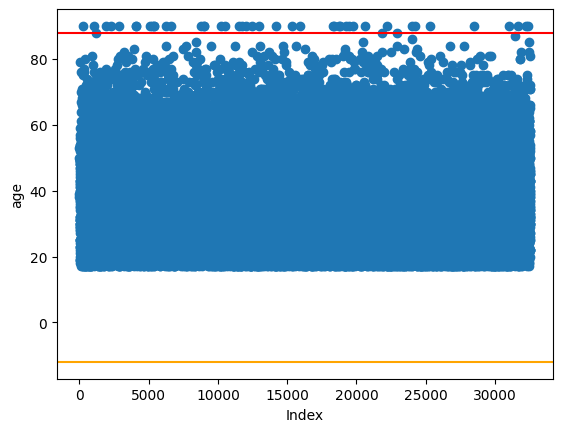

117827.0
237051.0


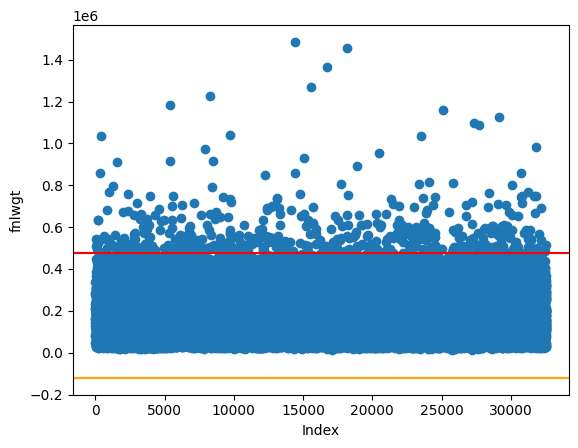

9.0
12.0


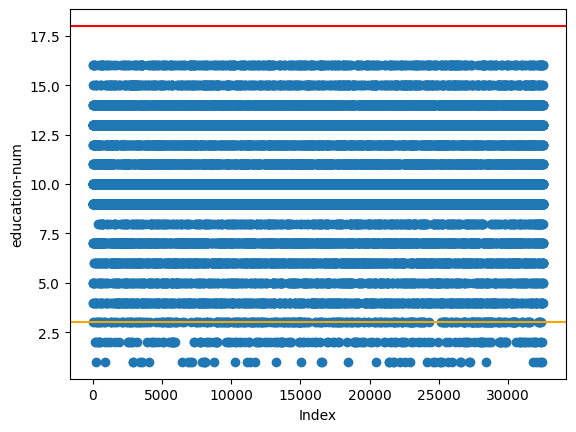

0.0
0.0


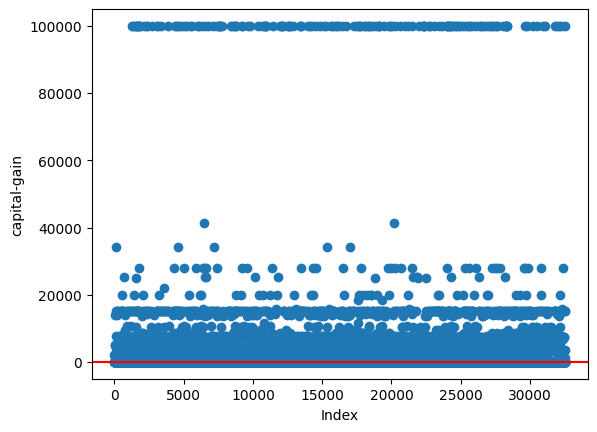

0.0
0.0


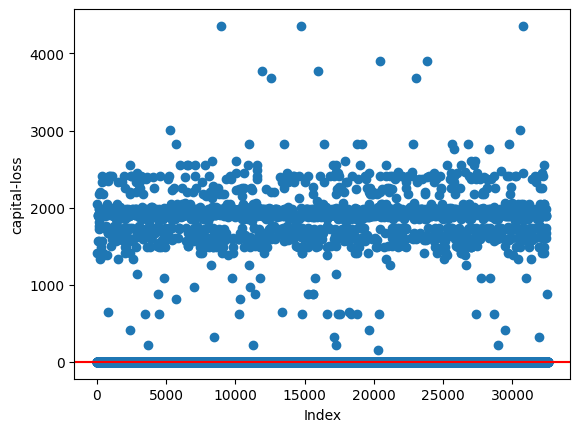

40.0
45.0


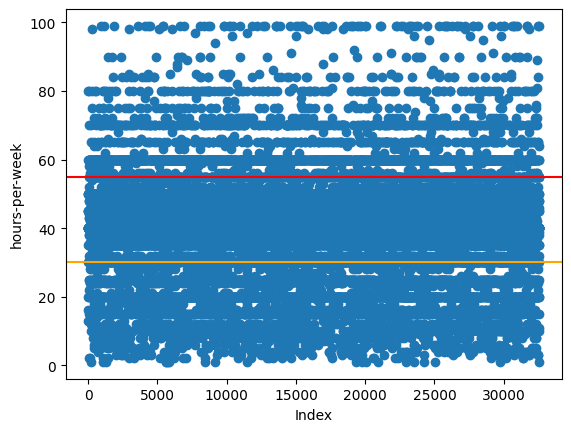

In [6]:
import matplotlib.pyplot as plt

def drawGraph(key, a, b):
    plt.scatter(DataFrame.index, DataFrame[key])
    plt.axhline(y=a, color='orange')
    plt.axhline(y=b, color='red')
    plt.xlabel('Index')
    plt.ylabel(key)
    plt.show()

def analizeNumColIQR(key):
    quart1 = DataFrame[key].quantile(0.25)
    quart3 = DataFrame[key].quantile(0.75)
    IQR = quart3 - quart1
    print(quart1)
    print(quart3)
    a = quart1 - 2 * IQR
    b = quart3 + 2 * IQR
    
    drawGraph(key, a, b)
    
    deviations = (DataFrame[key] > b) | (DataFrame[key] < a)
    #DataFrame.loc[deviations, key] = np.nan
    
#.select_dtypes(include=[np.number]).columns.tolist()
for key in marksTypes.keys():
    if marksTypes[key] == ['continuous']:
        analizeNumColIQR(key)

Тут вже метод стандартного відхилення. Він, як на мене, ідеально підходить - на більшості графіків позбавляє того що насправді виглядає як викиди, хоч графіки "capital-gain" та "capital-loss" всеодно себе погано почувають, але тут справа в тому що у багатьох людей немає ніякого бізнесу тому ці параметри у них нулі. Як на мене позбавлятися від них неможно, бо вони насправді можуть бути дуже інформативні, причому нанів в них немає. Тому дивлячись на те що в них немає як таких викидів я вирішив їх залишити я є. (Також тут я видаляю данні визначені як викиди)

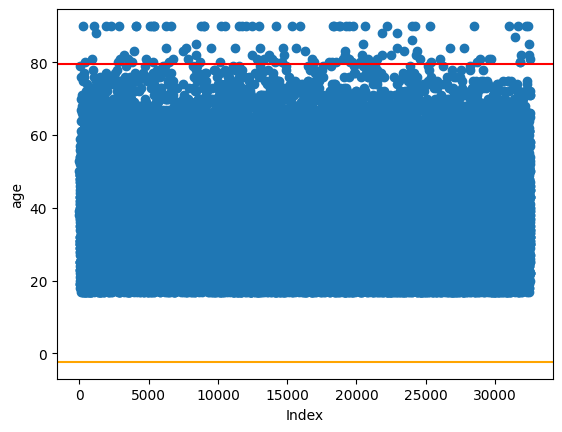

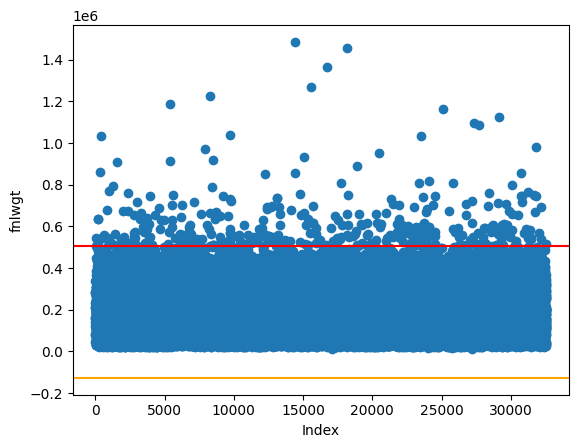

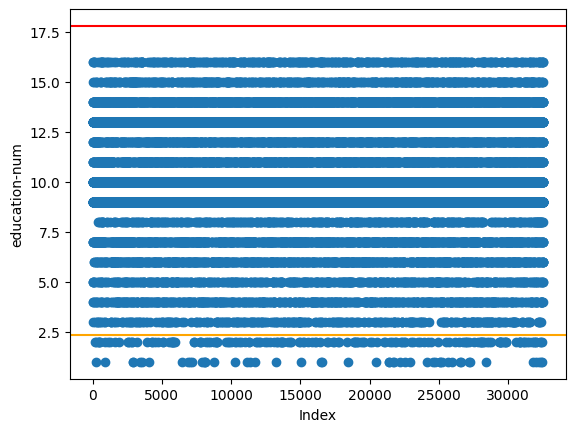

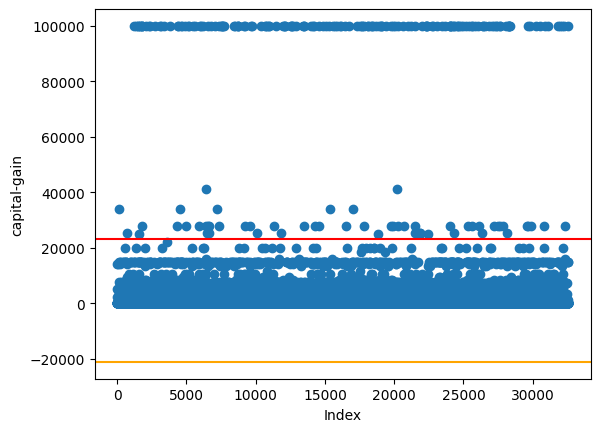

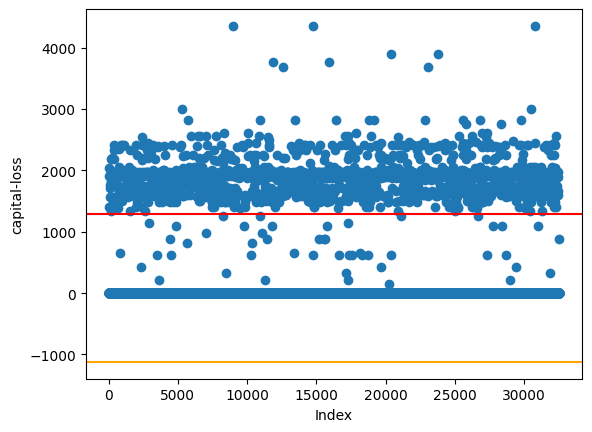

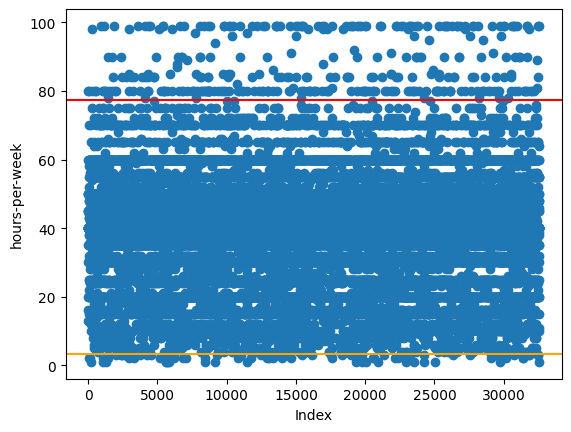

In [6]:
def analizeNumColSD(key):
    mean = DataFrame[key].mean()
    std = DataFrame[key].std()
    
    a = mean - 3 * std
    b = mean + 3 * std
    
    drawGraph(key, a, b)
    
def delNumColSD(key):
    mean = DataFrame[key].mean()
    std = DataFrame[key].std()
    
    a = mean - 3 * std
    b = mean + 3 * std
    
    deviations = (DataFrame[key] > b) | (DataFrame[key] < a)
    DataFrame.loc[deviations, key] = pd.NA
    
for key in marksTypes.keys():
    if marksTypes[key] == ['continuous']:
        analizeNumColSD(key)
        if key!="capital-gain" and key!= "capital-loss":
            delNumColSD(key)

Графіки розподілу даних після видалення викидів.

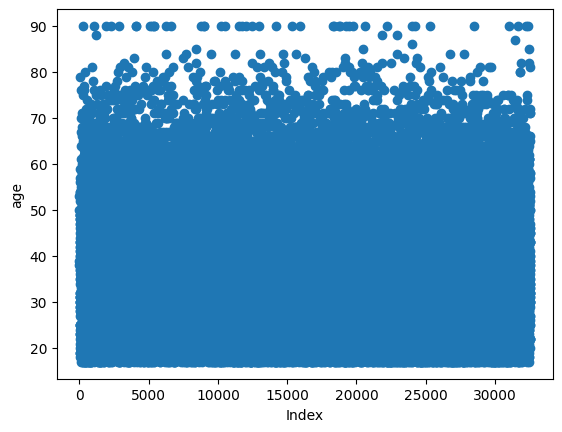

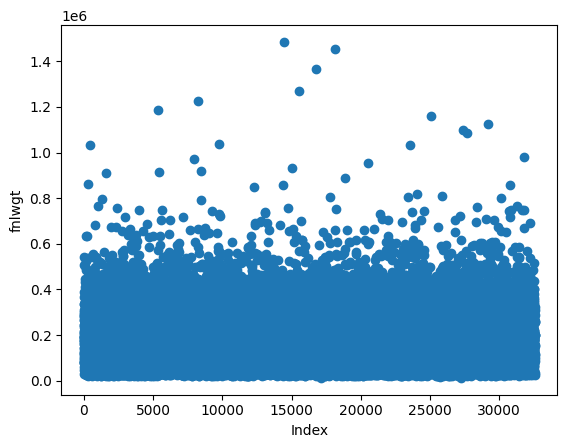

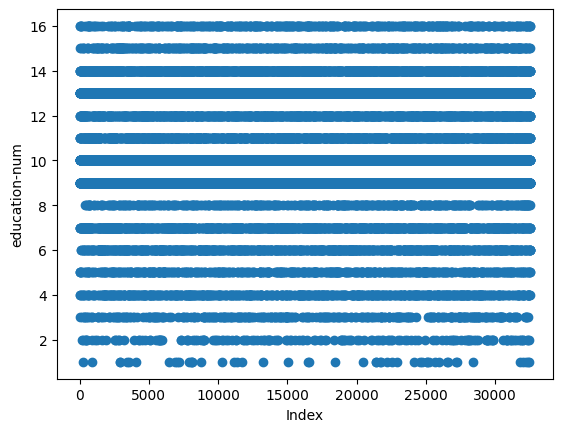

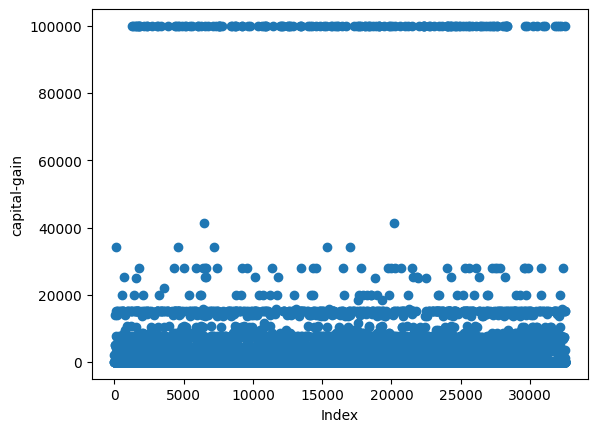

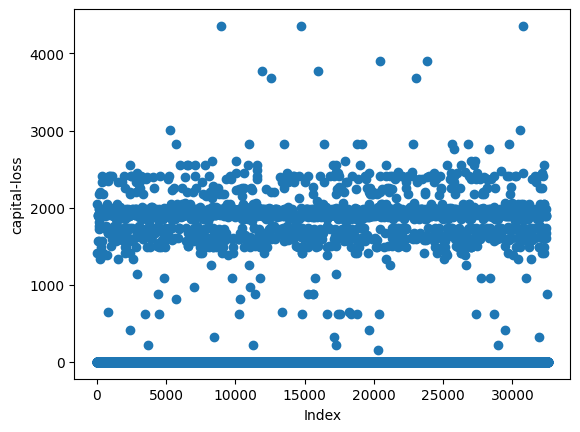

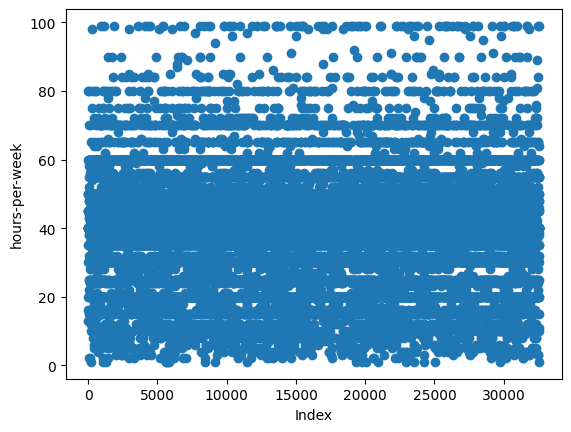

In [31]:
def dGraph(key):
    plt.scatter(DataFrame.index, DataFrame[key])
    plt.xlabel('Index')
    plt.ylabel(key)
    plt.show()

for key in marksTypes.keys():
    if marksTypes[key] == ['continuous']:
        dGraph(key)

Видалення рядків з нанами - DataFrame = DataFrame.dropna(axis=0)

Видалення стовпців з нанами - DataFrame = DataFrame.dropna(axis=1)

Заповнення нанів середнім - DataFrame = DataFrame.fillna(df.mean())

Заповнення нанів в данному стовпці середнім - DataFrame[key] = DataFrame[key].fillna(DataFrame[key].mean())

Заповнення нанів в данному стовпці медіаною - DataFrame[key] = DataFrame[key].fillna(DataFrame[key].median())

Заповнення нанів в данному стовпці модом - DataFrame[key] = DataFrame[key].fillna(DataFrame[key].mode())

Тут я заповнюю нани в числових класах середнім, видаляю мітки (перетворюю на нан) категоріальних класів яких менше 1%, та потім видаляю усі рядки в яких є нани. Благо розмір датасету дозволяє.

In [32]:
for key in marksTypes.keys():
    if marksTypes[key] == ['continuous']:
        if 0<DataFrame[key].isna().sum():
            DataFrame[key] = DataFrame[key].fillna(DataFrame[key].mean())
    else:
        value_counts = DataFrame[key].value_counts(normalize=True)
        deviations = value_counts[value_counts < 0.01].index

        DataFrame.loc[DataFrame[key].isin(deviations), key] = pd.NA
        
DataFrame

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,<NA>,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


І останні штрихи - нормалізую числові данні, та перетворюю категоріальні в ванхот вектори.

In [33]:
for key in marksTypes.keys():
    if marksTypes[key] == ['continuous']:
        minimum = DataFrame[key].min()
        maximum = DataFrame[key].max()

        DataFrame[key] = (DataFrame[key] - minimum) / (maximum - minimum)

DataFrame['income'] = DataFrame['income'].replace({'>50K': 1, '<=50K': 2})
DataFrame = pd.get_dummies(DataFrame, dtype=int)
DataFrame

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_White,sex_Female,sex_Male,native-country_Mexico,native-country_United-States
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,2,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,2,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,2,0,0,1,...,0,0,0,0,0,1,0,1,0,1
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,2,0,0,1,...,0,0,0,0,1,0,0,1,0,1
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,2,0,0,1,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,2,0,0,1,...,0,0,1,0,0,1,1,0,0,1
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,2,0,0,1,...,0,1,0,0,0,1,1,0,0,1
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,2,0,0,1,...,1,0,0,0,0,1,0,1,0,1


In [36]:
for col in DataFrame:
    if (not col in marksTypes.keys()) and DataFrame[col].sum()/32560<0.01:
        DataFrame=DataFrame.drop(col, axis=1)
        
    print(col+' - ' +str(DataFrame[col].sum()/32560))
        
DataFrame

age - 0.29564807646999425
fnlwgt - 0.12054904020765493
education-num - 0.6053972153972152
capital-gain - 0.010776927179591205
capital-loss - 0.02004281704694928
hours-per-week - 0.4024353783282355
income - 1.7592444717444717
workclass_Federal-gov - 0.029484029484029485
workclass_Local-gov - 0.06428132678132678
workclass_Private - 0.697051597051597
workclass_Self-emp-inc - 0.03427518427518428
workclass_Self-emp-not-inc - 0.07804054054054053
workclass_State-gov - 0.03986486486486487
education_10th - 0.028654791154791154
education_11th - 0.036087223587223584
education_12th - 0.013298525798525798
education_5th-6th - 0.010227272727272727
education_7th-8th - 0.019840294840294842
education_9th - 0.015786240786240788
education_Assoc-acdm - 0.03277027027027027
education_Assoc-voc - 0.04244471744471744
education_Bachelors - 0.16446560196560198
education_Doctorate - 0.012684275184275184
education_HS-grad - 0.322512285012285
education_Masters - 0.05291769041769042
education_Prof-school - 0.0176904

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_White,sex_Female,sex_Male,native-country_Mexico,native-country_United-States
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,2,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,2,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,2,0,0,1,...,0,0,0,0,0,1,0,1,0,1
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,2,0,0,1,...,0,0,0,0,1,0,0,1,0,1
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,2,0,0,1,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,2,0,0,1,...,0,0,1,0,0,1,1,0,0,1
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,2,0,0,1,...,0,1,0,0,0,1,1,0,0,1
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,2,0,0,1,...,1,0,0,0,0,1,0,1,0,1


In [38]:
DataFrame['income'] = DataFrame['income'].replace({1: 0, 2: 1})
DataFrame.to_csv('done_data.csv', index=False)